# Matplotlib fundamentals

In [2]:
import pandas as pd
import duckdb

df = pd.read_csv("data/norway_new_car_sales_by_make.csv")
df.head()

,Year,Month,Make,Quantity,Pct
0,2007,1,Toyota,2884,22.7
1,2007,1,Volkswagen,2521,19.9
2,2007,1,Peugeot,1029,8.1
3,2007,1,Ford,870,6.9
4,2007,1,Volvo,693,5.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4377 entries, 0 to 4376
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      4377 non-null   int64  
 1   Month     4377 non-null   int64  
 2   Make      4367 non-null   object 
 3   Quantity  4377 non-null   int64  
 4   Pct       4377 non-null   float64
dtypes: float64(1), int64(3), object(1)
memory usage: 171.1+ KB


In [4]:
df.shape

(4377, 5)

In [5]:
df_quantity_brand = duckdb.query(
    """--sql
    SELECT make as Brand, SUM(quantity) as Quantity
    FROM df
    GROUP BY make
    order by quantity DESC
    """
).df()
df_quantity_brand.head()

,Brand,Quantity
0,Volkswagen,206669.0
1,Toyota,168177.0
2,Volvo,99937.0
3,Ford,99713.0
4,BMW,73315.0


## Bar chart

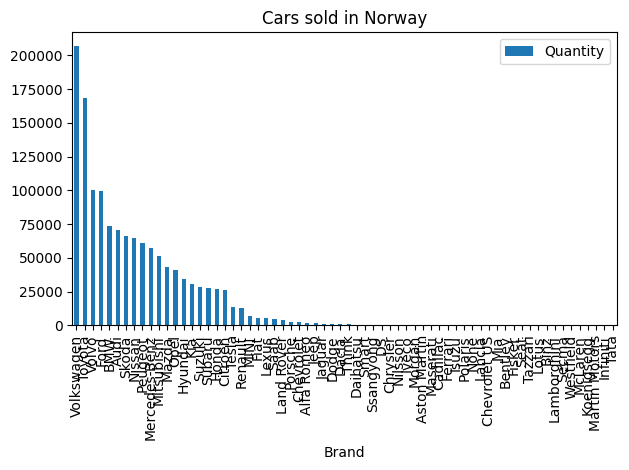

In [6]:
ax = df_quantity_brand.plot(kind='bar', x= "Brand", y="Quantity", title="Cars sold in Norway")
fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/cars_sold_norway")

In [7]:
df_quantity_brand_top10 = df_quantity_brand.iloc[:10]
df_quantity_brand_top10

,Brand,Quantity
0,Volkswagen,206669.0
1,Toyota,168177.0
2,Volvo,99937.0
3,Ford,99713.0
4,BMW,73315.0
5,Audi,70475.0
6,Skoda,66007.0
7,Nissan,64535.0
8,Peugeot,61033.0
9,Mercedes-Benz,57557.0


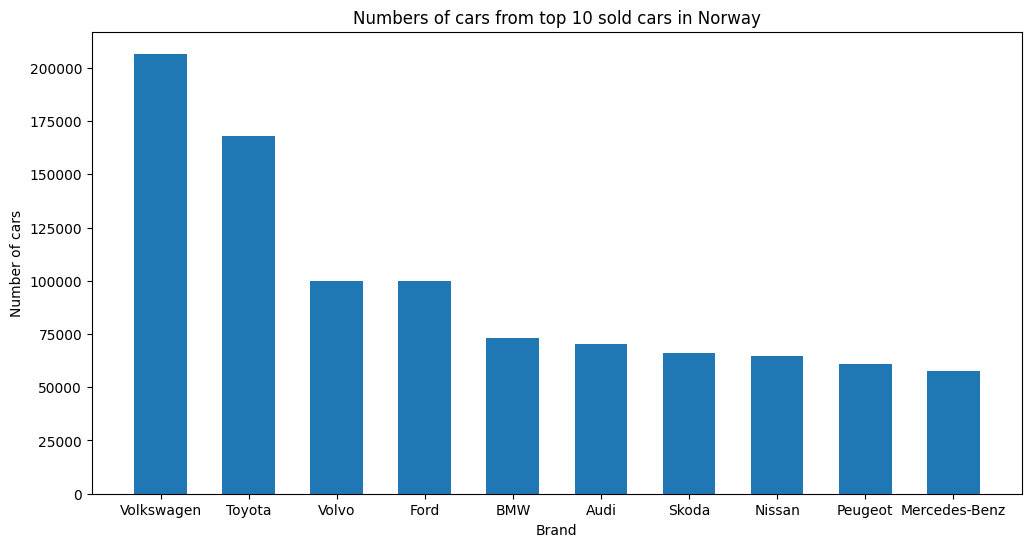

In [8]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (12,6))
ax.bar(x= df_quantity_brand_top10["Brand"], height=df_quantity_brand_top10["Quantity"], width=.6)
ax.set(title = "Numbers of cars from top 10 sold cars in Norway", xlabel= "Brand", ylabel="Number of cars")
fig = ax.get_figure()
fig.tight_layout
fig.savefig("figures/cars_sold_norway_2")

## Stacked bar

In [9]:
df_date = duckdb.query(
    """--sql
    SELECT 
    year || '-' || LPAD(CAST(month AS VARCHAR), 2, '0') AS date, 
    make as Brand, 
    SUM(quantity) AS Quantity
    FROM df
    WHERE make IN ('Volvo', 'Volkswagen', 'Toyota')
    GROUP BY year, month, make
    ORDER BY year, month
"""
).df()
df_date["date"] = pd.to_datetime(df_date["date"], format="%Y-%m")
df_date.head()

,date,Brand,Quantity
0,2007-01-01,Volkswagen,2521.0
1,2007-01-01,Volvo,693.0
2,2007-01-01,Toyota,2884.0
3,2007-02-01,Toyota,1885.0
4,2007-02-01,Volkswagen,1517.0


In [10]:
df_date_pivot = df_date.pivot(values="Quantity", index="date", columns="Brand").fillna(0)
df_date_pivot

Brand,Toyota,Volkswagen,Volvo
date,,,
2007-01-01,2884.0,2521.0,693.0
2007-02-01,1885.0,1517.0,570.0
2007-03-01,1833.0,1428.0,656.0
2007-04-01,1300.0,1257.0,587.0
2007-05-01,1866.0,1934.0,805.0
...,...,...,...
2016-09-01,1823.0,2084.0,763.0
2016-10-01,1327.0,2161.0,732.0
2016-11-01,1375.0,2106.0,754.0


In [11]:
df_date_pivot.loc["2016"]

Brand,Toyota,Volkswagen,Volvo
date,,,
2016-01-01,1106.0,1743.0,643.0
2016-02-01,1374.0,2044.0,732.0
2016-03-01,1537.0,2236.0,687.0
2016-04-01,1432.0,3017.0,748.0
2016-05-01,1687.0,2222.0,619.0
2016-06-01,1603.0,2287.0,766.0
2016-07-01,1127.0,2076.0,635.0
2016-08-01,1824.0,2359.0,463.0
2016-09-01,1823.0,2084.0,763.0


In [12]:
months = df_date_pivot.loc["2016"].index.month_name()
months

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object', name='date')

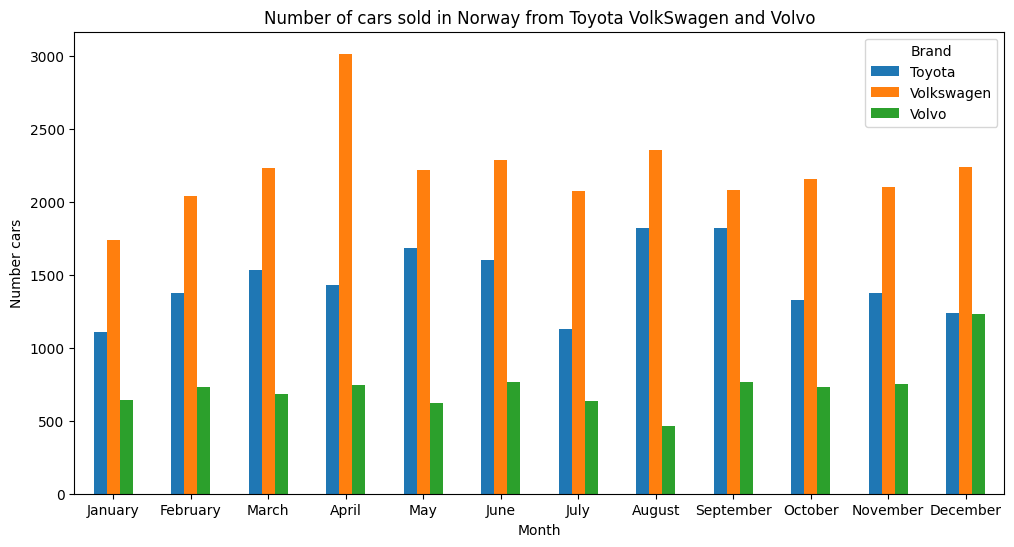

In [13]:
ax = df_date_pivot.loc["2016"].plot(kind="bar", figsize=(12,6))
ax.set_xticklabels(months, rotation=0)
ax.set(title="Number of cars sold in Norway from Toyota VolkSwagen and Volvo",
       xlabel="Month",
       ylabel="Number cars")

fig = ax.get_figure()
fig.tight_layout
fig.savefig("figures/stacked_cars")

## Line chart
some kind of trend or continous numbers. -> timseries

In [20]:
df_yearly_quantity = duckdb.query(
    """--sql
    SELECT
        year, SUM(quantity) as Quantity
    FROM df
    GROUP BY year
    ORDER BY year
"""
).df().set_index("Year")
df_yearly_quantity

,Quantity
Year,
2007,129195.0
2008,110617.0
2009,98675.0
2010,127754.0
2011,138345.0
2012,137967.0
2013,142151.0
2014,144202.0
2015,150686.0


<Axes: xlabel='Year'>

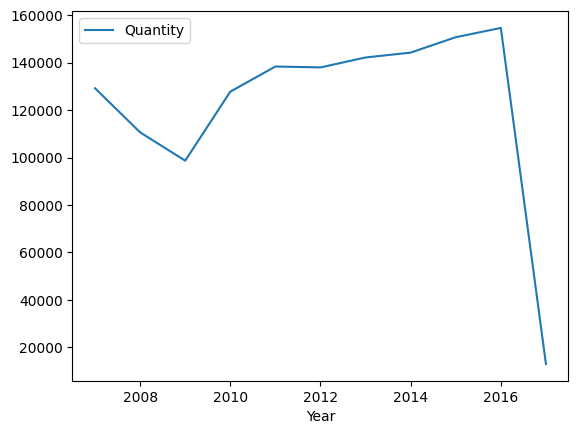

In [21]:
df_yearly_quantity.plot()

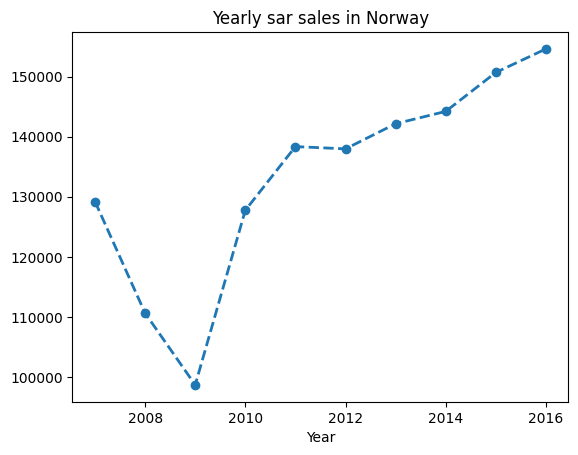

In [29]:
ax = df_yearly_quantity.iloc[:-1].plot(linewidth=2, style="--o")
ax.set(title="Yearly sar sales in Norway")
ax.legend().remove()